In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
cols = ['Pclass','Sex', 'Age', 'Fare'] 
target = df['Survived']

In [5]:
new = df[cols]

In [6]:
new

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [7]:
new.Age = new.Age.fillna(new.Age.mean())


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Gen = LabelEncoder()

In [10]:
new['Gender'] = Gen.fit_transform(new.Sex)

In [11]:
new = new.drop('Sex',axis = 'columns')

In [12]:
new

,Pclass,Age,Fare,Gender
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(new,target,test_size=0.2)

In [23]:
from sklearn import tree

In [24]:
model = tree.DecisionTreeClassifier()

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
model.score(X_test, y_test)

0.7821229050279329

In [27]:
model.predict([[3,22,7.25,1]])

array([0], dtype=int64)

In [33]:
ypredicted = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test,ypredicted)

<Axes: >

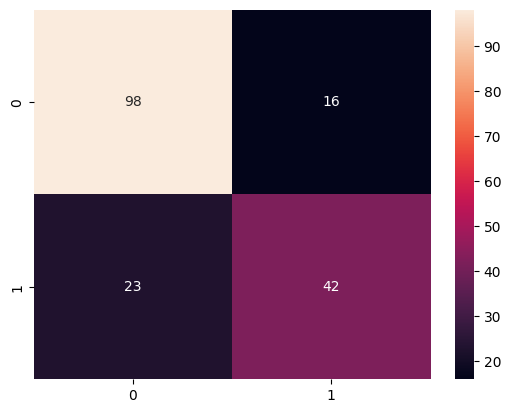

In [36]:
import seaborn as sns

sns.heatmap(cm, annot = True)


This heatmap is not for this case, i just used it for learning purpose